# Исследование поведения пользователей сервиса аренды самокатов

**Задача:** Проверить гипотезы сервиса аренды самокатов, чтобы помочь вырастить бизнес.

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

### Считывание файлов

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')

In [3]:
data_rides_go = pd.read_csv('/datasets/rides_go.csv')

In [4]:
data_subscr_go = pd.read_csv('/datasets/subscriptions_go.csv')

### Вывод первых строк каждого набора

In [5]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [7]:
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
data_rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [9]:
data_subscr_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
data_subscr_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Вывод

Информация о пользователях содержится в датафрейме data_users. В нем описаны данные об имени пользователя, возрасте, городе и типе подписке (есть или нет). Тип данных соотвествует значениям столбцов.

Информация о поездках содержится в датафрейме data_rides_go. В нем описаны данные о расстоянии которое преодолел пользователь, продолжительности поездки и дате совершения поездки. Тип данных в столбце date не соответсвует значениям столбца.

Информация о подписках содержится в датафрейме data_subscr_go. В нем описаны данные о типе подписке, стоимости одной минуты по данной подписке, стоимости начала поездки и стоимости ежемесячного платежа. Тип данных соответствует значениям столбцов. 

Датафреймы data_users и data_rides_go связаны между собой по уникальному идентификатору пользователя, а data_subscr_go содержит общую информацию по условиям подписок. 

## Шаг 2. Предобработка данных

### Перевод столбца date к типу даты pandas

In [11]:
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format='%Y-%m-%d', errors='raise')

*Проверка*

In [12]:
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создание нового столбца с номером месяца на основе столбца date

In [13]:
data_rides_go['month_number'] = data_rides_go['date'].dt.month

*Проверка:*

In [14]:
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int64         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  float64       
 3   date          18068 non-null  datetime64[ns]
 4   month_number  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [15]:
data_rides_go.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Работа с пропусками и дубликатами

**Датафрейм о пользователях**

*Наличие пропущенных значений:*

In [16]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

*Пропущенных значений не выявлено*

*Наличие явных дубликатов:*

In [17]:
data_users.duplicated().sum()

31

*Удаление явных дубликатов*

In [18]:
data_users = data_users.drop_duplicates()

*Проверка:*

In [19]:
data_users.duplicated().sum()

0

*Упорядочивание индексов после удаления*

In [20]:
data_users = data_users.reset_index(drop=True)

In [21]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Датафрейм о поездках**

*Наличие пропущенных значений*

In [22]:
data_rides_go.isna().sum()

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64

*Пропущенных значений не выявлено*

*Наличие явных дубликатов:*

In [23]:
data_rides_go.duplicated().sum()

0

*Явных дубликатов не выявлено*

**Датафрейм о подписках содержит общую информацию о тарифах и не нуждается в проверке**

### Вывод

Датафрейм о пользователях:

- пропущенных значений не выявлено
- удалены явные дубликаты
- неявные дубликаты не выявлены, возможно по причине того, что при сборе данных каждому пользователю присваивают свой уникальный номер

Датафрейм о поездках:

- пропущенных значений не выявлено
- явных дубликатов не выявлено
- неявные дубликаты не выявлены, возможно по причине того, что при сборе данных каждому пользователю присваивают свой уникальный номер

Датафрейм о подписках содержит общую информацию о тарифах и не нуждается в проверке

## Шаг 3. Исследовательский анализ данных

### Описание и визуализация информации о частоте встречаемости городов

In [24]:
display(data_users.groupby('city')['city'].count().sort_values(ascending=False))

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

**Чаще других самокаты в аренду берут в Пятигорске, реже всего в Москве.**

<AxesSubplot:title={'center':'Визуализация информации о частоте встречаемости городов'}, ylabel='city'>

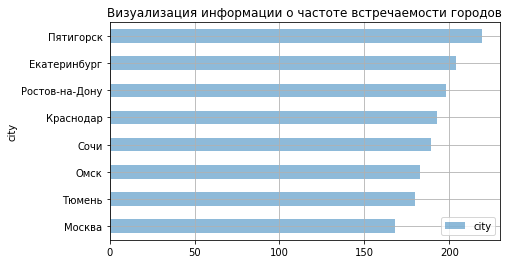

In [25]:
((data_users.groupby('city')['city'].count().sort_values()).plot(kind='barh', grid=True, figsize=(7, 4), alpha=0.5, legend=True, title='Визуализация информации о частоте встречаемости городов'))

*По диаграмме можно отметить, что распределение значений практически находится на одном уровне, с незначительным отрывом.*

### Описание и визуализация информации о соотношении пользователей с подпиской и без подписки

In [26]:
display(data_users.groupby('subscription_type')['subscription_type'].count())

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64

*Безусловно пользователь предпочитает получать услугу дешевле, поэтому число пользователей без подписки превосходит число пользователей с подпиской, хотя и с небольшим отрывом. Возможно это связано также с тем, что некоторые пользователи лишь время от времени используют самокаты и в связи с эти не хотят оформлять подписку.*

<AxesSubplot:title={'center':'Визуализация информации о соотношении пользователей с подпиской и без подписки'}, ylabel='subscription_type'>

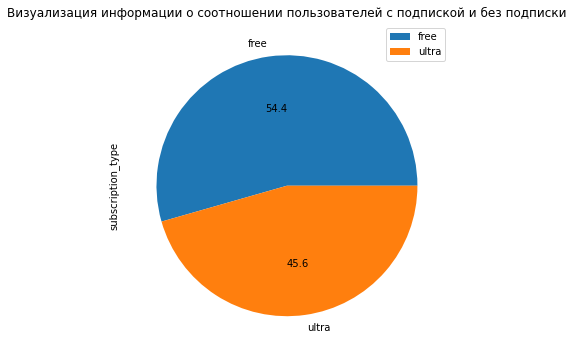

In [27]:
((data_users.groupby('subscription_type')['subscription_type'].count()).plot(kind='pie', figsize=(6, 6), legend=True, autopct='%.1f', title='Визуализация информации о соотношении пользователей с подпиской и без подписки'))


**Пользователей без подписки - 54%, с подпиской - 46%.**

### Описание и визуализация информации о возрасте пользователей

In [28]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

*Средний возраст пользователей 25 лет, минимальный 12 лет и самые возрастные пользователи это лица в возрасте 43 лет.*

<AxesSubplot:title={'center':'Визуализация информации о возрасте пользователей'}, xlabel='age'>

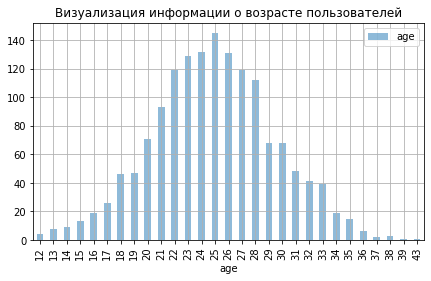

In [29]:
(data_users.groupby('age')['age'].count().plot(kind='bar', grid=True, legend=True, alpha=0.5, figsize=(7, 4), title='Визуализация информации о возрасте пользователей'))

**По диаграмме можно отметить, что чаще остальных услугой пользуются лица в возрасте от 20 до 30 лет.**

### Описание и визуализация информации о расстоянии, которое пользователь преодолел за одну поездку

In [30]:
data_rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

*В среднем пользователь за одну поездку преодолевает расстояние около 3 км.*

<AxesSubplot:title={'center':'Визуализация информации о расстоянии, которое пользователь преодолел за одну поездку'}, ylabel='Frequency'>

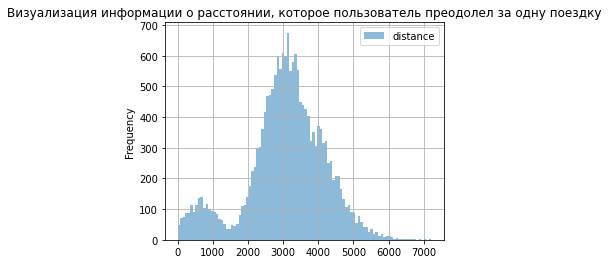

In [31]:
data_rides_go['distance'].plot(kind='hist', bins=100, grid=True, legend=True, alpha=0.5, figsize=(5, 4), title='Визуализация информации о расстоянии, которое пользователь преодолел за одну поездку')

**По визуализации данных можно определить две группы пользователей: одна которая использует самокат для расстояний до 1,5 км, другая, та, что использует самокат от 1,5 км и до 7 км. Чаще всего люди предпочитают брать самокат на расстояния от 2 км и до 4,5 км.**

### Описание и визуализация информации о продолжительности поездок

In [32]:
data_rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

*В среднем пользователь тратит около 18 минут на одну поездку. Максимальное время поездки 41 минута.*

<AxesSubplot:title={'center':'Визуализация информации о продолжительности поездок'}, ylabel='Frequency'>

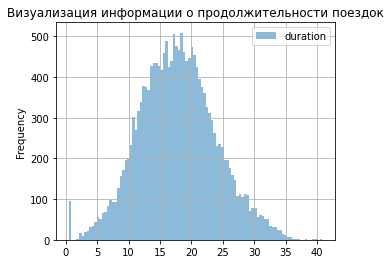

In [33]:
data_rides_go['duration'].plot(kind='hist', bins=100, grid=True, legend=True, alpha=0.5, figsize=(5, 4), title='Визуализация информации о продолжительности поездок')

**Согласно визуализации данных чаще всего длительность поездки составляет от 10 до 25 минут.**

*В районе нулевого значения имеется пик в данных, вероятнее всего это может быть связано с ситуациями когда пользователь взял разряженный или неисправный самокат, а также возможно были финансовые трудности или вдруг началась сильная непогода.*

### Вывод

**Описание информации о частоте встречаемости городов:**

- чаще других самокаты в аренду берут в Пятигорске, реже всего в Москве
- распределение значений практически находится на одном уровне, с незначительным отрывом между городами

**Описание информации о соотношении пользователей с подпиской и без подписки:**

- число пользователей без подписки превосходит число пользователей с подпиской, хотя и с небольшим отрывом. Возможно это связано также с тем, что некоторые пользователи лишь время от времени используют самокаты и в связи с эти не хотят оформлять подписку
- пользователей без подписки - 54%, с подпиской - 46%

**Описание информации о возрасте пользователей:**

- средний возраст пользователей 25 лет, минимальный 12 лет и самые возрастные пользователи это лица в возрасте 43 лет
- чаще остальных услугой пользуются лица в возрасте от 20 до 30 лет

**Описание информации о расстоянии, которое пользователь преодолел за одну поездку:**

- в среднем пользователь за одну поездку преодолевает расстояние около 3 км
- по визуализации данных можно определить две группы пользователей: одна которая использует самокат для расстояний до 1,5 км, другая, та, что использует самокат от 1,5 км и до 7 км. Чаще всего люди предпочитают брать самокат на расстояния от 2 км и до 4,5 км

**Описание и визуализация информации о продолжительности поездок:**

- в среднем пользователь тратит около 18 минут на одну поездку, максимальное время поездки 41 минута
- чаще всего длительность поездки составляет от 10 до 25 минут
- в районе нулевого значения имеется пик в данных, вероятнее всего это может быть связано с ситуациями когда пользователь взял разряженный или неисправный самокат, а также возможно были финансовые трудности или вдруг началась сильная непогода

## Шаг 4. Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [34]:
data_common = data_users.merge(data_rides_go, on='user_id', how='left')

In [35]:
data_common = data_common.merge(data_subscr_go, on='subscription_type', how='left')

*Проверка:*

In [36]:
data_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month_number       18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [37]:
data_common.isna().sum() # на всякий случай проверка на пропуски

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_number         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

*Упорядочивание индексов после объединения:*

In [38]:
data_common.reset_index(drop=True)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


### Создание датафрейма с данными о пользователях без подписки

In [39]:
data_users_type_free = data_common.loc[data_common['subscription_type'] == 'free']

*Упорядочивание индексов после создания:*

In [40]:
data_users_type_free = data_users_type_free.reset_index(drop=True)

*Проверка:*

In [41]:
data_users_type_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


### Создание датафрейма с данными о пользователях с подпиской

In [42]:
data_users_type_ultra = data_common.loc[data_common['subscription_type'] == 'ultra']

*Упорядочивание индексов после создания:*

In [43]:
data_users_type_ultra = data_users_type_ultra.reset_index(drop=True)

*Проверка:*

In [44]:
data_users_type_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Визуализации информации о расстоянии и времени поездок для пользователей с подпиской и без

**Визуализации информации о расстоянии поездок для пользователей с подпиской и без**

*Составим визуализацию данных о преодоленном расстоянии пользователей без подписки:*

<AxesSubplot:title={'center':'Преодоленное расстояние пользователями без подписки'}, ylabel='Frequency'>

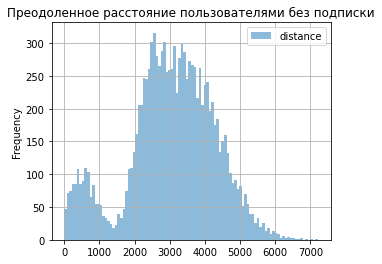

In [45]:
data_users_type_free['distance'].plot(kind='hist', grid=True, figsize=(5, 4), bins=100, alpha=0.5, legend=True, title='Преодоленное расстояние пользователями без подписки')

*Составим визуализацию данных о преодоленном расстоянии пользователей с подпиской:*

<AxesSubplot:title={'center':'Преодоленное расстояние пользователями с подпиской'}, ylabel='Frequency'>

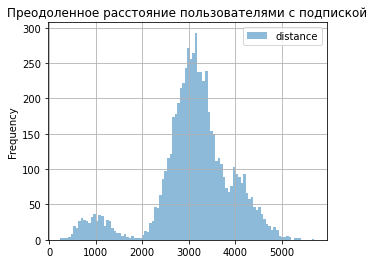

In [46]:
data_users_type_ultra['distance'].plot(kind='hist', grid=True, figsize=(5, 4), bins=100, alpha=0.5, legend=True, title='Преодоленное расстояние пользователями с подпиской')

*Составим два совмещенных графика о преодоленном расстоянии для пользователей с подпиской и без:*

*Для этого перименуем столбцы в датафреймах:*

In [47]:
data_users_type_free.columns = ['user_id', 'name', 'age', 'city', 'subscription_type', 'distance_free',
       'duration_free', 'date', 'month_number', 'minute_price', 'start_ride_price',
       'subscription_fee']
data_users_type_free. head()

,user_id,name,age,city,subscription_type,distance_free,duration_free,date,month_number,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [48]:
data_users_type_ultra.columns = ['user_id', 'name', 'age', 'city', 'subscription_type', 'distance_ultra',
       'duration_ultra', 'date', 'month_number', 'minute_price', 'start_ride_price',
       'subscription_fee']
data_users_type_ultra. head()

,user_id,name,age,city,subscription_type,distance_ultra,duration_ultra,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<AxesSubplot:title={'center':'Преодоленное расстояние пользователями'}, ylabel='Frequency'>

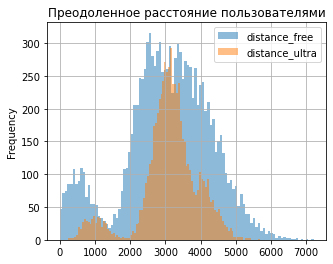

In [49]:
data_users_type_free['distance_free'].plot(kind='hist', grid=True, figsize=(5, 4), bins=100, alpha=0.5, legend=True, title='Преодоленное расстояние пользователями')
data_users_type_ultra['distance_ultra'].plot(kind='hist', grid=True, figsize=(5, 4), bins=100, alpha=0.5, legend=True)

*По визуализации данных можно сказать, что и пользователи с подпиской и пользователи без подписки используют самокаты или для преодоления коротких дистанций до 1,5 км или для дистанций от 1,5 км и выше. Пользователи с подпиской чаще совершают поездки на расстояние от 2 до 5 км, в то время как пользователи без подписки используют самокат и на расстояния до 7 км. У пользователей без подписки замечен всплеск значений в области до 1 км, в связи с этим посмотри детальнее эту область на другом типе визуализации:*

<AxesSubplot:title={'center':'Преодоленное расстояние пользователями'}, ylabel='Frequency'>

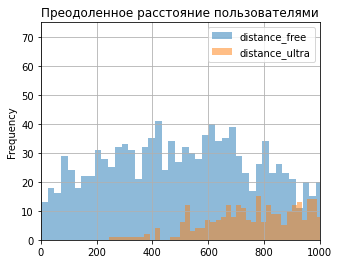

In [50]:
(data_users_type_free['distance_free'].plot(kind='hist', grid=True, figsize=(5, 4), bins=300, alpha=0.5, legend=True, xlim=(0,1000), ylim=(0,75)))
(data_users_type_ultra['distance_ultra'].plot(kind='hist', grid=True, figsize=(5, 4), bins=300, alpha=0.5, legend=True, xlim=(0,1000), title='Преодоленное расстояние пользователями'))

*На визуализации видно, что пользователи без подписки значительно чаще проделывают путь до нескольких сотен метров. Возможно (в дополнение к причинам озвученным ранее) это также связано с новыми пользователями, которые хотели попробовать услугу, но им она не понравилась.*

**Визуализации информации о времени поездок для пользователей с подпиской и без**

*Составим два совмещенных графика о времени поездок для пользователей с подпиской и без:*

<AxesSubplot:title={'center':'Время затраченное на поездку'}, ylabel='Frequency'>

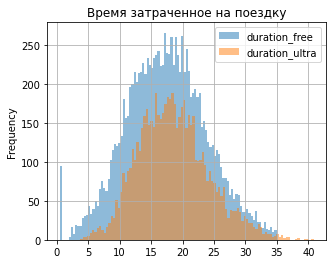

In [51]:
data_users_type_free['duration_free'].plot(kind='hist', grid=True, figsize=(5, 4), bins=100, alpha=0.5, legend=True)
data_users_type_ultra['duration_ultra'].plot(kind='hist', grid=True, figsize=(5, 4), bins=100, alpha=0.5, legend=True, title='Время затраченное на поездку')

*На визуализации видно, что пользователи с подпиской тратят на дорогу от 5 до 40 минут, в то время как у пользователей без подписки есть временной отрезок и до 5 минут в пути. Посмотрим какое количество пользователей проводят в дороге меньше двух минут:*

In [52]:
data_users_type_free.query('duration_free < 2')['user_id'].count()

95

### Вывод

**Пользователи с подпиской:**

- Преодоленное расстояние: пользователей можно разделить на две группы, одна из которых использует самокат на расстояние от нескольких метров до 2 км, другая от 2 км до 5,5 км. Чаще всего пользователи с подпиской проходят расстояние в районе 2,5 - 3,5 км.

- Время в пути: пользователи с подпиской тратят на дорогу от 5 до 40 минут. Чаще всего в они находятся в пути от 12 до 25 минут.

**Пользователи без подписки:**

- Преодоленное расстояние:пользователей можно разделить на две группы, одна из которых использует самокат на расстояние  до 1,5 км, другая от 1,5 км до 7 км. Чаще всего пользователи с подпиской проходят расстояние в районе 2 - 5 км. Также обозначен вопрос "почему пользователи проделывают очень короткие расстояния", предполагаемые причины может быть в технической неисправности, финансовых обстоятельствах или личных предпочтениях, а также в погодных условиях.В виду того, что у пользователей с подпиской такого не наблюдается, можно предположить, что дело все-таки или в личных предпочтениях или в финансовых обстоятельствах.

- Время в пути: пользователи без подписки тратят на дорогу от 0 до 35 минут. Чаще всего в они находятся в пути от 10 до 25 минут. Замечено что 95 пользователей провели в пути меньше 2ух минут, возможно по причинам озвученным ранее.

## Шаг 5. Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках

*Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц:*

In [53]:
data_aggregated = (data_common.pivot_table(index=['user_id', 'month_number', 'subscription_type'], values=['distance', 'duration'],
                       aggfunc=({'distance': ['count', 'sum'], 'duration': 'sum'})))

*Проверка:*

In [54]:
data_aggregated

distance                 duration
                                          count           sum        sum
user_id month_number subscription_type                                  
1       1            ultra                    2   7027.511294  41.416640
        4            ultra                    1    754.159807   6.232113
        8            ultra                    2   6723.470560  44.776802
        10           ultra                    2   5809.911100  31.578017
        11           ultra                    3   7003.499363  53.397424
...                                         ...           ...        ...
1534    6            free                     2   3409.468534  24.812678
        8            free                     2   7622.453034  47.205960
        9            free                     1   4928.173852  22.560373
        11           free                     4  13350.015305  76.342174
        12           free                     1   2371.711192  15.893917

[11331 rows x 3 columns]

### Добавление столбца с помесячной выручкой, которую принес каждый пользователь

*Создаем столбец и запишем туда нулевые значения:*

In [55]:
data_aggregated['income_month'] = 0.0
data_aggregated.columns = ['count', 'distance_month_tot', 'duration_month_tot', 'income_month']
data_aggregated['duration_month_tot'] = np.ceil(data_aggregated['duration_month_tot'])

*Проверка:*

In [56]:
data_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1, 'ultra') to (1534, 12, 'free')
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               11331 non-null  int64  
 1   distance_month_tot  11331 non-null  float64
 2   duration_month_tot  11331 non-null  float64
 3   income_month        11331 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 410.6+ KB


In [57]:
data_aggregated

count  distance_month_tot  \
user_id month_number subscription_type                              
1       1            ultra                  2         7027.511294   
        4            ultra                  1          754.159807   
        8            ultra                  2         6723.470560   
        10           ultra                  2         5809.911100   
        11           ultra                  3         7003.499363   
...                                       ...                 ...   
1534    6            free                   2         3409.468534   
        8            free                   2         7622.453034   
        9            free                   1         4928.173852   
        11           free                   4        13350.015305   
        12           free                   1         2371.711192   

                                        duration_month_tot  income_month  
user_id month_number subscription_type                                    
1       1            ultra                            42.0           0.0  
        4            ultra                             7.0           0.0  
        8            ultra                            45.0           0.0  
        10           ultra                            32.0           0.0  
        11           ultra                            54.0           0.0  
...                                                    ...           ...  
1534    6            free                             25.0           0.0  
        8            free                             48.0           0.0  
        9            free                             23.0           0.0  
        11           free                             77.0           0.0  
        12           free                             16.0           0.0  

[11331 rows x 4 columns]

*С помощью функции заполним столбец значениями:*

In [58]:
user_unique = data_common['user_id'].unique()

for i in user_unique:
    test = (data_aggregated.loc[i, 'count'] * \
                data_common.loc[data_common['user_id'] == i, 'start_ride_price'].max()) + \
           (data_aggregated.loc[i, 'duration_month_tot'] * \
                data_common.loc[data_common['user_id'] == i, 'minute_price'].max()) + \
            data_common.loc[data_common['user_id'] == i, 'subscription_fee'].max()
    
    test = test.dropna()

    for j in test.index:
        data_aggregated.loc[(i,j,), 'income_month'] = test[j]

*Округлим значения с помесячной выручкой и проверим действия:*

In [59]:
data_aggregated['income_month'] = np.ceil(data_aggregated['income_month'])
data_aggregated

count  distance_month_tot  \
user_id month_number subscription_type                              
1       1            ultra                  2         7027.511294   
        4            ultra                  1          754.159807   
        8            ultra                  2         6723.470560   
        10           ultra                  2         5809.911100   
        11           ultra                  3         7003.499363   
...                                       ...                 ...   
1534    6            free                   2         3409.468534   
        8            free                   2         7622.453034   
        9            free                   1         4928.173852   
        11           free                   4        13350.015305   
        12           free                   1         2371.711192   

                                        duration_month_tot  income_month  
user_id month_number subscription_type                                    
1       1            ultra                            42.0         451.0  
        4            ultra                             7.0         241.0  
        8            ultra                            45.0         469.0  
        10           ultra                            32.0         391.0  
        11           ultra                            54.0         523.0  
...                                                    ...           ...  
1534    6            free                             25.0         300.0  
        8            free                             48.0         484.0  
        9            free                             23.0         234.0  
        11           free                             77.0         816.0  
        12           free                             16.0         178.0  

[11331 rows x 4 columns]

### Вывод

**Выполнены действия:**

- создание датафрейма с агрегированными данными о поездках
- добавление столбца с помесячной выручкой, которую принес каждый пользователь в столбец income_month

## Шаг 6. Проверка гипотез

### Гипотеза - "тратят ли пользователи с подпиской больше времени на поездки"

**Обозначаем нулевую гипотезу H0** - пользователь с подпиской в среднем тратит столько же времени на поездку как и пользователь без подписки.
**Обозначаем альтернативную гипотезу H1** - пользователь с подпиской в среднем тратит больше времени, чем пользователи без подписки.

In [60]:
from scipy import stats as st

In [61]:
# пользователи с подпиской
sample_ultra = data_users_type_ultra['duration_ultra']

# пользователи без подписки
sample_free = data_users_type_free['duration_free']

alpha = 0.05 # уровень значимости

# Проведение  t-теста
results = st.ttest_ind(sample_ultra, sample_free, alternative = 'greater')

display(f'p-value: {results.pvalue}')

# Проверка значимости 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
# Посмотрим среднюю длительность поездок на разных тарифах   
print(round(sample_ultra.mean(),2))
print(round(sample_free.mean(),2))
print()

'p-value: 1.2804098316645618e-34'

Отвергаем нулевую гипотезу
18.54
17.39



**Нулевая гипотеза может быть отвергнута. Это значит, что пользователь с подпиской в среднем НЕ тратит столько же времени на поездку как и пользователь без подписки. И вполне вероятно, что пользователь с подпиской в среднем тратит больше времени, чем пользователи без подписки. **

### Гипотеза - "можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров"

**Обозначаем нулевую гипотезу H0** - пользователь с подпиской в среднем проезжает расстояние равное 3130 метров.

**Обозначаем альтернативную гипотезу H1** - пользователь с подпиской в среднем проезжает расстояние, большее чем 3130 м.

In [62]:
distance_value = 3130.0 #сколько метров должны проезжать

alpha = 0.05 # уровень значимости

# Проведение  t-теста
results = st.ttest_1samp(a=data_users_type_ultra['distance_ultra'], popmean=distance_value, alternative='greater')

display(f'p-value: {results.pvalue}')

# Проверка значимости 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

'p-value: 0.9195368847849785'

Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза не может быть отвергнута. Это означает, что пользователь с подпиской в среднем проезжает расстояние равное 3130 метров. С точки зрения износа самоката можно рассчитать сколько поездок может совершить один самокат, при его характеристиках. Также можно определить на сколько поездок приблизительно хватит заряда аккумулятора у самоката.**

### Гипотеза - "будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"

**Обозначаем нулевую гипотезу H0** - пользователь с подпиской в среднем приносят такую же выручку как и пользователи без подписки.

**Обозначаем альтернативную гипотезу H1** - пользователь с подпиской в среднем приносит большую  выручку, чем пользователи без подписки.

In [63]:
# пользователи с подпиской
income_ultra = data_aggregated.query('subscription_type == "ultra"')['income_month']

# пользователи без подписки
income_free = data_aggregated.query('subscription_type == "free"')['income_month']

alpha = 0.05 # уровень значимости

# Проведение  t-теста
results = st.ttest_ind(income_ultra, income_free, alternative='greater')

display(f'p-value: {results.pvalue}')

# Проверка значимости 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

'p-value: 2.8130926188487286e-35'

Отвергаем нулевую гипотезу


**Нулевая гипотеза может быть отвергнута. Это означает, что пользователь с подпиской в среднем НЕ приносят такую же выручку как и пользователи без подписки и вполне вероятно, что пользователь с подпиской в среднем приносит большую  выручку, чем пользователи без подписки.**

### Гипотеза - "уменьшилось ли количество обращений в техническую поддержку после обновления сервера"

*Из-за того, что есть файл где содержаться данные для каждого пользователя о количестве обращений до и после обновления, а не приходиться сравнивать одну генеральную совокупность с которой произошли изменения, то тут понадобится t-test с проверкой односторонней гипотезы (влево).*

### Вывод

**Гипотеза - "тратят ли пользователи с подпиской больше времени на поездки"** - можно сказать, что пользователи с подпиской в среднем не тратят столько же времени на поездки, сколько пользователи без подписки и вполне вероятно, что они могут тратить в среднем больше времени на поездки.

**Гипотеза - "можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров"** - можно сказать, что пользователь с подпиской в среднем проезжает расстояние равное 3130 метров.

**Гипотеза - "будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"** - можно сказать, что пользователь с подпиской в среднем не приносят такую же выручку как и пользователи без подписки.


## Общий вывод

**Передали данные о работе сервиса аренды самокатов GoFast:**

- Информация о пользователях содержится в датафрейме data_users. В нем описаны данные об имени пользователя, возрасте, городе и типе подписке (есть или нет). Тип данных соотвествует значениям столбцов.

- Информация о поездках содержится в датафрейме data_rides_go. В нем описаны данные о расстоянии которое преодолел пользователь, продолжительности поездки и дате совершения поездки. Тип данных в столбце date не соответсвует значениям столбца.

- Информация о подписках содержится в датафрейме data_subscr_go. В нем описаны данные о типе подписке, стоимости одной минуты по данной подписке, стоимости начала поездки и стоимости ежемесячного платежа. Тип данных соответствует значениям столбцов. 

- Датафреймы data_users и data_rides_go связаны между собой по уникальному идентификатору пользователя, а data_subscr_go содержит общую информацию по условиям подписок. 

**Выполнена предобработка данных:**

Датафрейм о пользователях:

- пропущенных значений не выявлено
- удалены явные дубликаты
- неявные дубликаты не выявлены, возможно по причине того, что при сборе данных каждому пользователю присваивают свой уникальный номер

Датафрейм о поездках:

- пропущенных значений не выявлено
- явных дубликатов не выявлено
- неявные дубликаты не выявлены, возможно по причине того, что при сборе данных каждому пользователю присваивают свой уникальный номер

Датафрейм о подписках содержит общую информацию о тарифах и не нуждается в проверке

**Описание информации о частоте встречаемости городов:**

- чаще других самокаты в аренду берут в Пятигорске, реже всего в Москве
- распределение значений практически находится на одном уровне, с незначительным отрывом между городами

**Описание информации о соотношении пользователей с подпиской и без подписки:**

- число пользователей без подписки превосходит число пользователей с подпиской, хотя и с небольшим отрывом. Возможно это связано также с тем, что некоторые пользователи лишь время от времени используют самокаты и в связи с эти не хотят оформлять подписку
- пользователей без подписки - 54%, с подпиской - 46%

**Описание информации о возрасте пользователей:**

- средний возраст пользователей 25 лет, минимальный 12 лет и самые возрастные пользователи это лица в возрасте 43 лет
- чаще остальных услугой пользуются лица в возрасте от 20 до 30 лет

**Описание информации о расстоянии, которое пользователь преодолел за одну поездку:**

- в среднем пользователь за одну поездку преодолевает расстояние около 3 км
- по визуализации данных можно определить две группы пользователей: одна которая использует самокат для расстояний до 1,5 км, другая, та, что использует самокат от 1,5 км и до 7 км. Чаще всего люди предпочитают брать самокат на расстояния от 2 км и до 4,5 км

**Описание и визуализация информации о продолжительности поездок:**

- в среднем пользователь тратит около 18 минут на одну поездку, максимальное время поездки 41 минута
- чаще всего длительность поездки составляет от 10 до 25 минут
- в районе нулевого значения имеется пик в данных, вероятнее всего это может быть связано с ситуациями когда пользователь взял разряженный или неисправный самокат, а также возможно были финансовые трудности или вдруг началась сильная непогода

**Пользователи с подпиской:**

- Преодоленное расстояние: пользователей можно разделить на две группы, одна из которых использует самокат на расстояние от нескольких метров до 2 км, другая от 2 км до 5,5 км. Чаще всего пользователи с подпиской проходят расстояние в районе 2,5 - 3,5 км.

- Время в пути: пользователи с подпиской тратят на дорогу от 5 до 40 минут. Чаще всего в они находятся в пути от 12 до 25 минут.

**Пользователи без подписки:**

- Преодоленное расстояние:пользователей можно разделить на две группы, одна из которых использует самокат на расстояние  до 1,5 км, другая от 1,5 км до 7 км. Чаще всего пользователи с подпиской проходят расстояние в районе 2 - 5 км. Также обозначен вопрос "почему пользователи проделывают очень короткие расстояния", предполагаемые причины может быть в технической неисправности, финансовых обстоятельствах или личных предпочтениях, а также в погодных условиях.В виду того, что у пользователей с подпиской такого не наблюдается, можно предположить, что дело все-таки или в личных предпочтениях или в финансовых обстоятельствах.

- Время в пути: пользователи без подписки тратят на дорогу от 0 до 35 минут. Чаще всего в они находятся в пути от 10 до 25 минут. Замечено что 95 пользователей провели в пути меньше 2ух минут, возможно по причинам озвученным ранее.

**Выполнены действия:**

- создание датафрейма с агрегированными данными о поездках
- добавление столбца с помесячной выручкой, которую принес каждый пользователь в столбец income_month

**Гипотеза - "тратят ли пользователи с подпиской больше времени на поездки"** - можно сказать, что пользователи с подпиской в среднем не тратят столько же времени на поездки, сколько пользователи без подписки и вполне вероятно, что они могут тратить в среднем больше времени на поездки.

**Гипотеза - "можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров"** - можно сказать, что пользователь с подпиской в среднем проезжает расстояние равное 3130 метров.С точки зрения износа самоката можно рассчитать сколько поездок может совершить один самокат, при его характеристиках. Также можно определить на сколько поездок приблизительно хватит заряда аккумулятора у самоката.

**Гипотеза - "будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки"** - можно сказать, что пользователь с подпиской в среднем не приносят такую же выручку как и пользователи без подписки, и вполне вероятно, что пользователь с подпиской в среднем приносит большую  выручку, чем пользователи без подписки.